In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def h(x, w):
  return x @ w

**LOSS FUNCTION Minimum Square Error (MSE)**

In [ ]:
def error_mse(x, y, w):
  return sum((h(x, w) - y) ** 2) / (2*len(y))

In [ ]:
def loss_function_mse(x, y, w):
  return np.sum((h(x, w) - y) * x, axis = 0, keepdims= True).T / len(y)

**LOSS FUNCTION Minimum Absolute Error (MAE)**

In [ ]:
def error_mae(x, y, w):
  return sum(np.abs(h(x, w) - y)) / len(y)

In [ ]:
def loss_function_mae(x, y, w):
  diff = (h(x, w) - y)
  return np.sum((diff / np.abs(diff)) * x, axis = 0, keepdims= True).T / len(y)

**LOSS FUNCTION WITH REGULAIRZATION RIDGE**

In [ ]:
def regularization_ridge(error_function, x, y, w):
  w_0 = np.copy(w)
  w_0[0] = 0
  return error_function(x, y, w) + (lambda_v * sum(w_0*w_0)) /  (2*len(y))

In [ ]:
def ridge_regression(w):
  with_w0 = lambda_v * w 
  with_w0[0][0] = 0
  return with_w0

In [ ]:
def lost_function_ridge(loss_function, x, y, w):
  return loss_function(x, y, w) + (ridge_regression(w))/ len(y) 

**LOSS FUNCTION WITH REGULARIZATION LASSO**

In [ ]:
def regularization_lasso(error_function, x, y, w):
  w_0 = np.copy(w)
  w_0[0] = 0
  return error_function(x, y, w) + (lambda_v * np.abs(w_0))/ (2*len(y))

In [ ]:
def lasso_regression(w):
  with_w0 = np.repeat(lambda_v, len(w))
  with_w0.shape = (len(w), 1)
  with_w0[0][0] = 0
  return with_w0 

In [ ]:
def lost_function_lasso(loss_function, x, y, w):
  return loss_function(x, y, w) + lasso_regression(w)/ len(y)

**Generate DataSet**

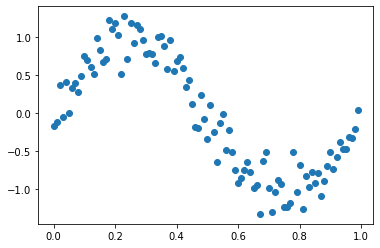

In [ ]:
x = np.arange(0, 1, .01)
y = np.array([np.sin(2*i*np.pi)+np.random.normal(0,0.2)  for i in x])
y.shape = (len(x), 1) #(10, 1) nrows = 10, ncols = 1
ones = np.ones(len(x))
x = np.c_[ones, x]
plt.scatter(x[:,1], y)

**Generate Train and Test DataSet**

In [ ]:
def getSetTraining(x, y):
  index = np.arange(0, len(y), step = 1)
  index_limit = int(.75*len(index))
  np.random.shuffle(index)
  index_train, index_test = index[:index_limit], index[index_limit:]
  index_train = np.sort(index_train)
  index_test = np.sort(index_test)
  return x[index_train,:], x[index_test,:],y[index_train,:], y[index_test,:]
x_train, x_test, y_train, y_test = getSetTraining(x, y)

In [ ]:
def getMatrixWithDimensionW(x_p):
  dim = len(w)
  i = x_train.shape[1] - 1
  xcopy = np.copy(x_p)
  while (dim > i + 1):
      x_tmp = xcopy[:,i] * xcopy[:,1]
      xcopy = np.c_[xcopy, x_tmp]
      i += 1
  return xcopy

**Batch Gradient Descent**

In [ ]:
def batch_gradient_descent(loss_function, x, y, w):
  return - alpha * loss_function(x, y, w)

**Stochastic Gradient Descent**

In [ ]:
def stochastic_gradient_descent(loss_function, x, y, w):
  index_rand = np.random.permutation(len(y))[0]
  example_x = x[index_rand:index_rand+1,:]
  example_y = y[index_rand:index_rand+1,:]
  return - alpha * loss_function(example_x, example_y, w)

**Momentum Stochastic Gradient Descent**

In [ ]:
def momentum_stochastic_gradient_descent(loss_function, x, y, w): 
  global prev_gradient
  val_ret = (gamma * prev_gradient) + batch_gradient_descent(loss_function, x, y, w)
  prev_gradient = np.copy(val_ret)
  return val_ret

In [ ]:
1e-8

1e-08

**Parameters**

In [ ]:
alpha = 0.01  # learning rate
error_limit = 10**6 #4
lambda_v = 0.00001 # tuning parameter, for regularization
prev_gradient = 0 # for momemtun stochastic gradient descent
gamma = 0.9 # for momemtun stochastic gradient descent

In [ ]:
import time

w = np.zeros(shape = (4, 1))

list_error = []
prev_gradient = 0 # for momemtun stochastic gradient descent
xcopy = getMatrixWithDimensionW(x_train)

epochs = error_limit

bef = time.time()
while epochs:
  epochs -= 1
  #w = w + batch_gradient_descent(loss_function_mse, xcopy, y_train, w)
  #w = w + stochastic_gradient_descent(loss_function_mse, xcopy, y_train, w)
  w = w + momentum_stochastic_gradient_descent(loss_function_mse, xcopy, y_train, w)
  list_error.append(error_mse(xcopy, y_train, w))
  print(list_error[-1])
  #print(w)
  
aft = time.time()
print("Full time::",aft - bef)

In [ ]:
gamma = 0.9
prev_gradient_descent = 0
grad = prev_gradient_descent * gamma - gradient
w = w - grad
previ = gradient

$$w_0 + w_1 * x^1+ w_1 * x^2+ w_3 * x^3$$


**`Plotting Training DataSet`**

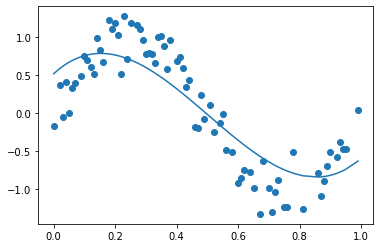

In [ ]:
yf_train = h(getMatrixWithDimensionW(x_train), w)
#yt.shape, x.shape
plt.scatter(x_train[:,1], y_train)
plt.plot(x_train[:,1], yf_train)

**`Plotting Training DataSet`**

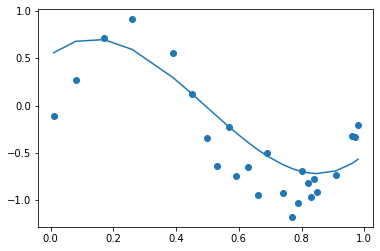

In [ ]:
yf_test = h(getMatrixWithDimensionW(x_test), w)
#yt.shape, x.shape
plt.scatter(x_test[:,1], y_test)
plt.plot(x_test[:,1], yf_test)

$$w_0 + w_1 * x^1+ w_1 * x^2+ w_1 * x^3 ... + w_1 * x^9$$

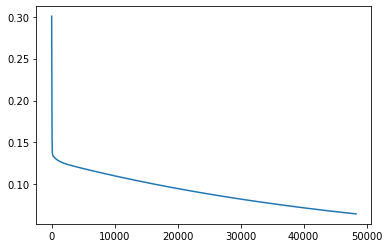

In [ ]:
list_error = np.array(list_error)
#plt.plot(list_error[2124124:])
plt.plot(list_error)
#np.where(list_error < 0.0350)                                                
#list_error[2]
#len(list_error)
